In [13]:
from drivecycle import drivecycle, trajectory
from drivecycle.utils import utils, plots

import matplotlib.pyplot as plt
import networkx as nx

import requests
import polyline
import json
import pandas as pd
import numpy as np

import pickle

In [3]:
with open('edges', 'rb') as handle:
    edges = pickle.load(handle)
    
with open('stops', 'rb') as handle:
    stops = pickle.load(handle)

In [4]:
data_ = []
for edge in edges:
    length = edge["length"]*1000
    speed = edge["speed"]
    way_id = edge["way_id"]
    try:
        intersect = [edge["end_node"]["intersecting_edges"][0]["road_class"]]
    except:
        intersect = [None]

    item = {
        "way_id":way_id,
        "length":length,
        "speed":speed,
        "intersection":intersect,
    }
    data_.append(item)

In [5]:
len(data_)

347

In [9]:
a = utils.Graph(data_)
a.include_stops(stops)
a.consolidate_intersections()
a.simplify_graph()


['bus_stop'] ['tertiary']
['tertiary'] ['bus_stop']
['tertiary'] ['bus_stop', 'tertiary']
['tertiary'] ['bus_stop', 'tertiary', 'tertiary']
['bus_stop'] ['bus_stop', 'tertiary', 'tertiary', 'tertiary']
['tertiary'] ['bus_stop', 'tertiary', 'tertiary', 'tertiary', 'bus_stop']
['tertiary'] ['bus_stop']
['tertiary'] ['bus_stop']
['secondary'] ['tertiary']
['secondary'] ['secondary']
['tertiary'] ['secondary', 'secondary']
['tertiary'] ['bus_stop']
['tertiary'] ['bus_stop', 'tertiary']
['bus_stop'] ['tertiary']
['secondary'] ['secondary']
['secondary'] ['secondary']
['secondary'] ['bus_stop']
['tertiary'] ['bus_stop']
['secondary'] ['bus_stop']
['tertiary'] ['bus_stop']
['tertiary'] ['tertiary']
['secondary'] ['tertiary', 'tertiary']
['tertiary'] ['tertiary']
['bus_stop'] ['tertiary', 'tertiary']
['secondary'] ['tertiary', 'tertiary', 'bus_stop']
['bus_stop'] ['secondary']
['secondary'] ['secondary']
['secondary'] ['secondary', 'secondary']
['secondary'] ['secondary']
['bus_stop'] ['second

In [25]:
stop={"bus_stop":30,"tertiary":10}
dc = drivecycle.Drivecycle(a.get_edges(),stops=stop, stop_at_node=True, step=1)
traj = dc.get_trajectory()

INFO:root:Could not complete segment: vi: 12.21 , vf: 0.00, v_target:11.11, length: 33.30
INFO:root:Could not complete segment: vi: 14.66 , vf: 0.00, v_target:13.89, length: 20.90


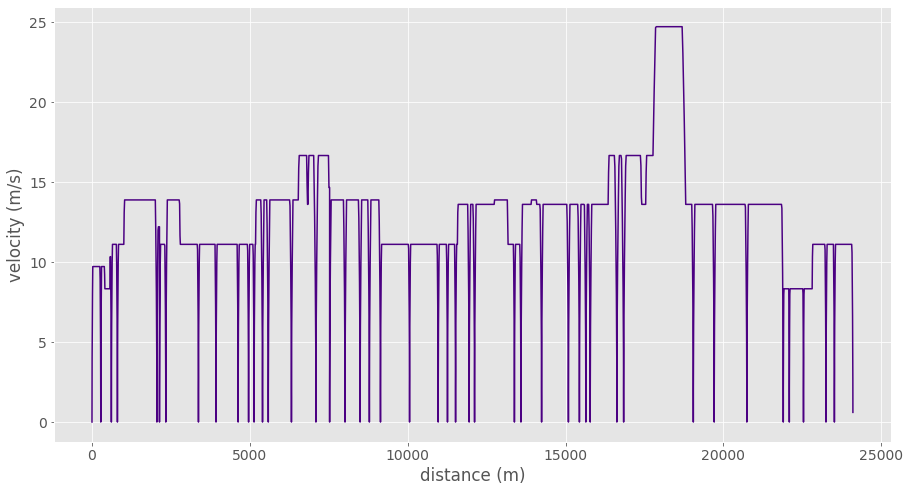

In [26]:
plots.plot_vd(traj,"route_drivecycle.png")

In [23]:
for i, (u,v) in enumerate(nx.bfs_edges(a.graph, 0)):
    print(a.graph[u][v])

{'way_id': 1994024746, 'speed': 35, 'length': 277.9, 'intersection': ['service_other', 'residential', 'residential', 'residential', 'bus_stop']}
{'way_id': 139293935, 'speed': 35, 'length': 126.10000000000002, 'intersection': ['residential']}
{'way_id': 417881805, 'speed': 30, 'length': 173.0, 'intersection': ['service_other', 'service_other', 'residential']}
{'way_id': 199138512, 'speed': 40, 'length': 46.89999999999998, 'intersection': ['bus_stop']}
{'way_id': 805857704, 'speed': 40, 'length': 192.39999999999998, 'intersection': ['service_other', 'residential', 'service_other', None, 'residential', 'bus_stop']}
{'way_id': 4651828, 'speed': 40, 'length': 204.70000000000005, 'intersection': ['residential']}
{'way_id': 584712185, 'speed': 50, 'length': 61.59999999999991, 'intersection': [None, 'bus_stop']}
{'way_id': 1468495918, 'speed': 50, 'length': 430.8000000000002, 'intersection': ['residential', 'bus_stop', 'tertiary', 'bus_stop']}
{'way_id': 3335612922, 'speed': 50, 'length': 577

In [24]:
len(a.get_edges())

116

In [8]:
a.get_edges()

[{'way_id': 463682703,
  'length': 7.0,
  'speed': 35,
  'intersection': ['service_other']},
 {'way_id': 463682703,
  'length': 67.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 463682703,
  'length': 156.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 463682702,
  'length': 44.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 139293935,
  'speed': 35,
  'length': 3.8999999999999773,
  'intersection': ['bus_stop']},
 {'way_id': 139293935,
  'speed': 35,
  'length': 126.10000000000002,
  'intersection': ['residential']},
 {'way_id': 139293935,
  'length': 144.0,
  'speed': 30,
  'intersection': ['service_other']},
 {'way_id': 139293935,
  'length': 16.0,
  'speed': 30,
  'intersection': ['service_other']},
 {'way_id': 139293935,
  'length': 13.0,
  'speed': 30,
  'intersection': ['residential']},
 {'way_id': 199138512,
  'speed': 40,
  'length': 46.89999999999998,
  'intersection': ['bus_stop']},
 {'way_id': 199138512,
  'speed': 40,


In [29]:
def consolidate_intersections(G, filters = ["tertiary","secondary","bus_stop"]):
    
    H = G.copy()

    for u,v in nx.bfs_successors(G, 0):
        
        n = v[0]
    
        in_edge = list(H.in_edges(n))
        out_edge = list(H.out_edges(n))
        
        if len(in_edge)>0 and len(out_edge)>0:
            
            u = in_edge[0]
            v = out_edge[0]
        
            e1 = H.edges[u]
            e2 = H.edges[v]

            l1 = e1["length"]
            l2 = e2["length"]

            if l1<200 and any(x in H.nodes[n]["intersection"] for x in filters) and any(x in H.nodes[u[0]]["intersection"] for x in filters):
                print(H.nodes[u[0]]["intersection"],H.nodes[n]["intersection"])
                H.add_edge(u[0],
                       v[1],
                       way_id=e1["way_id"] + e2["way_id"],
                       speed=e1["speed"],
                       length=l1+l2,
                       intersection=H.nodes[v[1]]["intersection"])
                H.nodes[u[0]]["intersection"] = H.nodes[n]["intersection"] + H.nodes[u[0]]["intersection"]
                H.remove_node(n)

            elif l2<200 and any(x in H.nodes[n]["intersection"] for x in filters) and any(x in H.nodes[v[1]]["intersection"] for x in filters):
                print(H.nodes[v[1]]["intersection"],H.nodes[n]["intersection"])
                H.add_edge(u[0],
                   v[1],
                   way_id=e1["way_id"] + e2["way_id"],
                   speed=e1["speed"],
                   length=l1+l2,
                   intersection=H.nodes[v[1]]["intersection"]+H.nodes[n]["intersection"])
                H.nodes[v[1]]["intersection"] = H.nodes[n]["intersection"] + H.nodes[v[1]]["intersection"]
                H.remove_node(n)

            else:
                continue

    return H
        

In [30]:
f = consolidate_intersections(a.graph)
# simple_edges = utils.get_edges(f,c)


['bus_stop'] ['tertiary']
['bus_stop'] ['tertiary', 'bus_stop']
['tertiary'] ['bus_stop']
['tertiary'] ['bus_stop', 'tertiary']
['tertiary'] ['bus_stop', 'tertiary', 'tertiary']
['bus_stop'] ['bus_stop', 'tertiary', 'tertiary', 'tertiary']
['tertiary'] ['bus_stop', 'tertiary', 'tertiary', 'tertiary', 'bus_stop']
['tertiary'] ['bus_stop']
['tertiary'] ['bus_stop']
['secondary'] ['tertiary']
['secondary'] ['secondary']
['tertiary'] ['secondary', 'secondary']
['tertiary'] ['bus_stop']
['tertiary'] ['bus_stop', 'tertiary']
['bus_stop'] ['tertiary']
['secondary'] ['secondary']
['secondary'] ['secondary']
['secondary'] ['bus_stop']
['tertiary'] ['bus_stop']
['secondary'] ['bus_stop']
['secondary'] ['bus_stop', 'secondary']
['tertiary'] ['bus_stop']
['tertiary'] ['tertiary']
['secondary'] ['tertiary', 'tertiary']
['tertiary'] ['bus_stop']
['tertiary'] ['tertiary']
['bus_stop'] ['tertiary', 'tertiary']
['secondary'] ['tertiary', 'tertiary', 'bus_stop']
['secondary'] ['tertiary', 'tertiary', 'b

In [33]:
simple_edges

[{'way_id': 463682703,
  'length': 7.0,
  'speed': 35,
  'intersection': ['service_other']},
 {'way_id': 463682703,
  'length': 67.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 463682703,
  'length': 156.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 463682702,
  'length': 44.0,
  'speed': 35,
  'intersection': ['residential']},
 {'way_id': 139293935,
  'speed': 35,
  'length': 3.8999999999999773,
  'intersection': ['bus_stop']},
 {'way_id': 139293935,
  'speed': 35,
  'length': 126.10000000000002,
  'intersection': ['residential']},
 {'way_id': 139293935,
  'length': 144.0,
  'speed': 30,
  'intersection': ['service_other']},
 {'way_id': 139293935,
  'length': 16.0,
  'speed': 30,
  'intersection': ['service_other']},
 {'way_id': 139293935,
  'length': 13.0,
  'speed': 30,
  'intersection': ['residential']},
 {'way_id': 199138512,
  'speed': 40,
  'length': 46.89999999999998,
  'intersection': ['bus_stop']},
 {'way_id': 199138512,
  'speed': 40,


In [12]:
G = nx.DiGraph()
graph = nx.path_graph(10,G)
graph.add_edge(2,100)
graph.add_edge(100,3)
graph.remove_edge(2,3)

node = 4
print(list(graph.predecessors(node)),node, list(graph.successors(node)))

[3] 4 [5]


In [13]:
for u in graph.nodes():
    print(f"node: {u}")

node: 0
node: 1
node: 2
node: 3
node: 4
node: 5
node: 6
node: 7
node: 8
node: 9
node: 100


In [16]:
for u,v in nx.bfs_successors(graph, 0):
    n = v[0]
#     print(n)
    print(list(G.in_edges(n)), list(G.out_edges(n)))

[(0, 1)] [(1, 2)]
[(1, 2)] [(2, 100)]
[(2, 100)] [(100, 3)]
[(100, 3)] [(3, 4)]
[(3, 4)] [(4, 5)]
[(4, 5)] [(5, 6)]
[(5, 6)] [(6, 7)]
[(6, 7)] [(7, 8)]
[(7, 8)] [(8, 9)]
[(8, 9)] []


In [86]:
a = list(graph.in_edges(n))[0]
graph.edges[a]

{}